In [156]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [157]:
data = pd.read_csv('listings_unitedstates_cleaned.csv')

In [158]:
data = data.drop(data.columns[[0]], axis = 1)

## Removing punctions

In [159]:
def remove_punctuation(text):
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [160]:
data['Description'] = data['Description'].apply(remove_punctuation)

In [161]:
data['Description'][0]

'Our Customer’s mission is to create groundbreaking sport innovations by making their products more sustainable building a creative and diverse global team and making a positive impact in communities where we live and work Their purpose is to bring inspiration and innovation to unite the world through sport to create a healthy planet active communities and an equal playing field for all  We are seeking an experienced Data Scientist on a contract basis to join our Customer’s Supply Chain organization  What you’ll do  Uses advanced mathematical and statistical concepts and theories to analyze and collect data and construct solutions to business problems Performs complex statistical analysis on experimental or business data to validate and quantify trends or patterns identified by business analysts Constructs predictive models algorithms and probability engines to support data analysis or product functions verifies model and algorithm effectiveness based on realworld results Integrates st

## Tokenize words

In [162]:
corpus = (" ".join(data['Description'].tolist())).lower()

In [163]:
import nltk

tokenized_corpus = nltk.word_tokenize(corpus)

## Stopwords

A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.


In [164]:
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [165]:
custom_stop_words = ["analysis","data","science","complex","environment",
                     "preferred","qualifications","required","development","design",
                     "relevant","develop","tools","including","ability","business",
                     "scientist","quantitative","related",'’', 'analytics', 'new', 'year',
                    'solution', 'technology', 'working', 'strong', 'using', 'problem',
                    'role', 'us', 'company', 'modeling', 'help']

for w in custom_stop_words:
    if w not in stop:
        stop.append(w)
    

In [166]:
tokens_no_stopword = [word.lower() for word in tokenized_corpus if word.lower() not in stop]

## Lemmatization
Lemmatization tries to achieve a similar base “stem” for a word. However, what makes it different is that it finds the dictionary word instead of truncating the original word.

In [167]:
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()

lemmatized_tokens = [lmtzr.lemmatize(token) for token in tokens_no_stopword]

## Word frequencies

In [168]:
fd = nltk.FreqDist(lemmatized_tokens)

# get the top words
top_words = []
for key, value in fd.items():
    top_words.append((key, value))

# sort the list by the top frequencies
top_words = sorted(top_words, key = lambda x:x[1], reverse = True)

In [169]:
top_words_20 = top_words[:20]
top_words_20 

[('experience', 4684),
 ('team', 3015),
 ('work', 2571),
 ('learning', 2244),
 ('model', 1875),
 ('machine', 1697),
 ('product', 1671),
 ('skill', 1669),
 ('year', 1308),
 ('solution', 1268),
 ('opportunity', 1258),
 ('customer', 1213),
 ('statistical', 1167),
 ('research', 1061),
 ('engineering', 1009),
 ('support', 963),
 ('knowledge', 957),
 ('project', 943),
 ('technique', 939),
 ('python', 931)]

In [170]:
from pandas import DataFrame

top_words= DataFrame(top_words_20 ,columns=['word','count'])

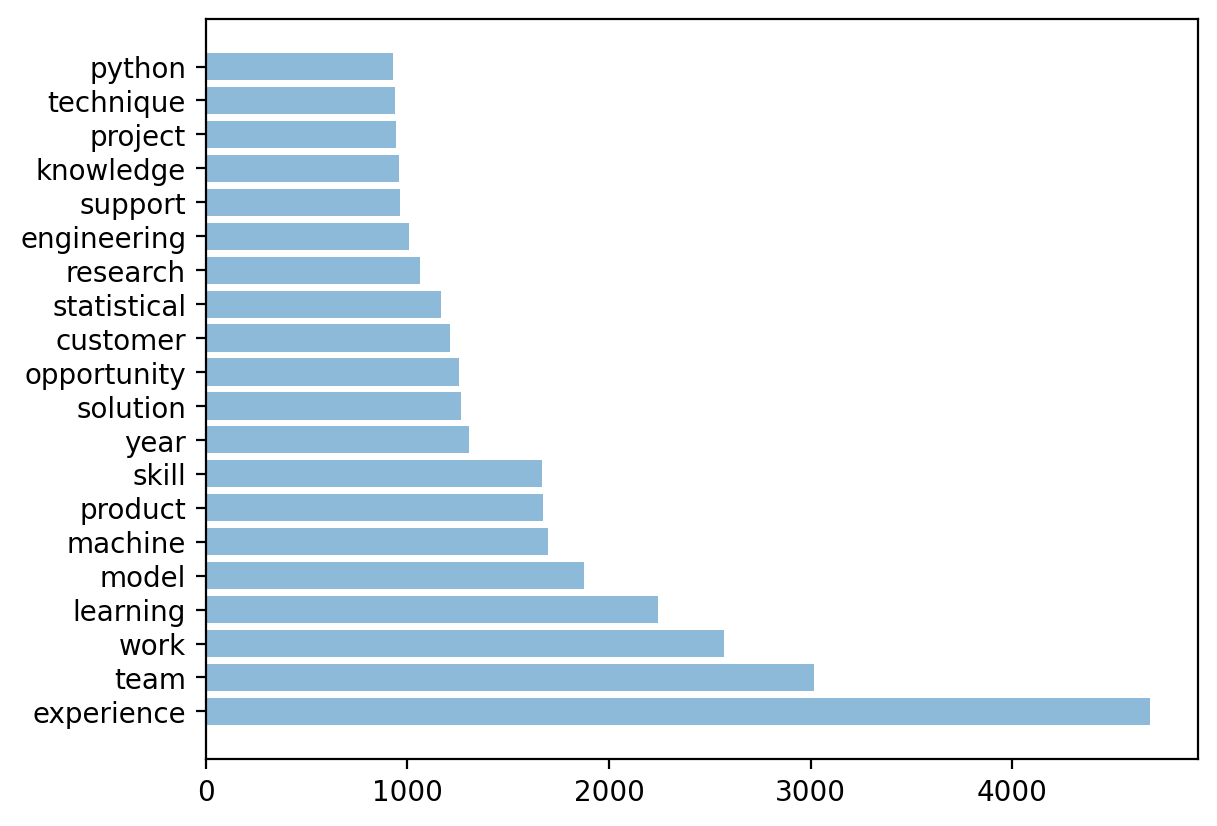

In [171]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
plt.barh(top_words['word'], top_words['count'], align='center', alpha=0.5)

plt.show()

## TF-IDF
TF-IDF is simply the TF multiplied by IDF.

Term Frequency (TF)

The number of times a word appears in a document divded by the total number of words in the document. 

Inverse Data Frequency (IDF)

The log of the number of documents divided by the number of documents that contain the word w. Inverse data frequency determines the weight of rare words across all documents in the corpus.

In [172]:
separator = ' '
tfId_corpus = [separator.join(tokens_no_stopword)]

In [173]:
from sklearn.feature_extraction.text import TfidfTransformer

tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(tfId_corpus)
df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
#df = pd.DataFrame(np.array([tfIdfVectorizer.get_feature_names(), tfIdf[0].T.todense().tolist()]), columns=['word', "TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
print (df.head(25))

               TF-IDF
experience   0.430915
work         0.236284
learning     0.212455
team         0.206069
machine      0.159270
skills       0.152884
models       0.136585
years        0.124766
solutions    0.120858
statistical  0.111232
research     0.100747
product      0.097411
engineering  0.096458
knowledge    0.091216
python       0.088737
techniques   0.088737
support      0.085687
technical    0.085306
degree       0.082637
teams        0.081494
statistics   0.081303
problems     0.081112
status       0.079778
computer     0.076728
information  0.074154


In [174]:
df['word'] = df.index

In [175]:
df_tfIdf = df.head(25)
df_tfIdf 

,TF-IDF,word
experience,0.430915,experience
work,0.236284,work
learning,0.212455,learning
team,0.206069,team
machine,0.159270,machine
skills,0.152884,skills
models,0.136585,models
years,0.124766,years
solutions,0.120858,solutions
statistical,0.111232,statistical


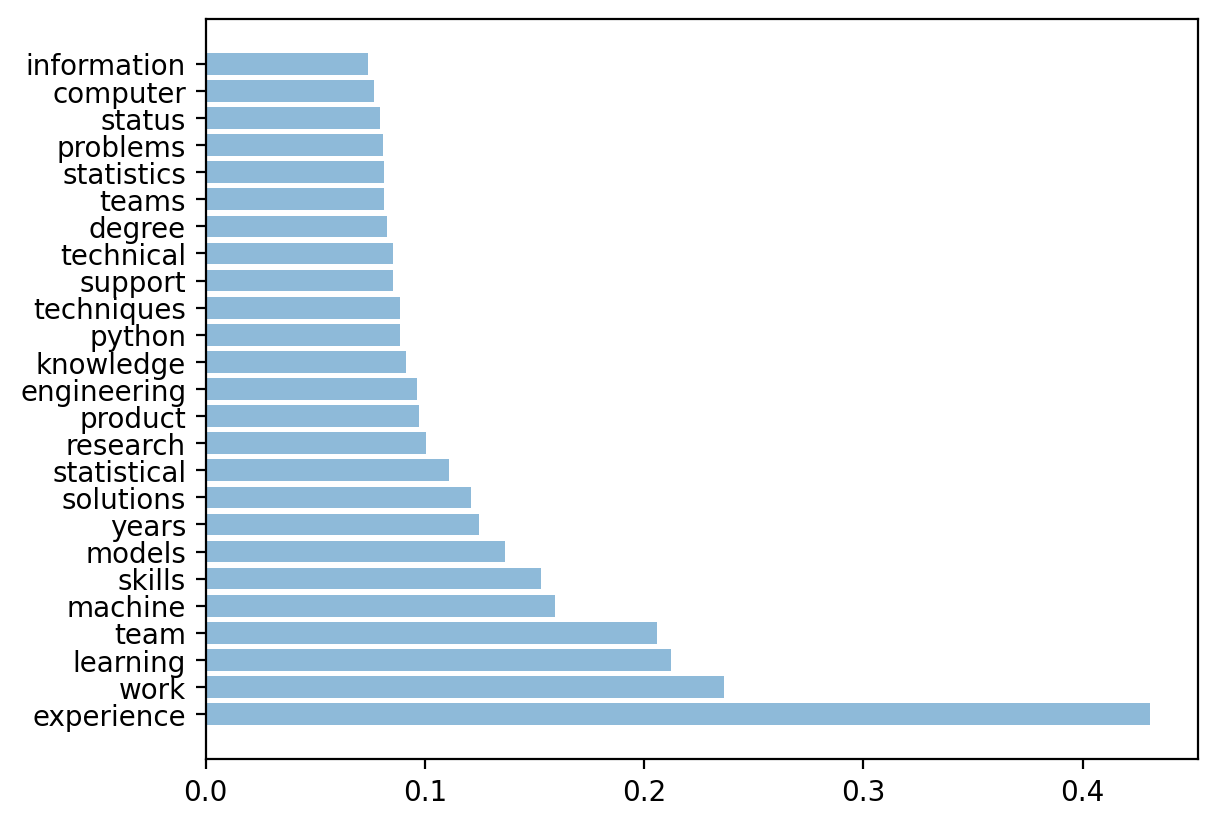

In [176]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
plt.barh(df_tfIdf['word'], df_tfIdf['TF-IDF'], align='center', alpha=0.5)

plt.show()

## Split the positions into Junior and Senior

In [177]:
data_1 = data.loc[data.Title.str.contains('Senior')]
data_2 = data.loc[data.Title.str.contains('Sr')]
data_3 = data.loc[data.Title.str.contains('II')]
data_Senior = (data_1.append(data_2)).append(data_3)

In [178]:
data_Senior.head()

,Title,Company,Location,Description,URL
3,Senior Data Scientist (Remote-friendly),Noom Inc.,"New York, NY",At Noom we use scientifically proven methods t...,https://www.indeed.com/viewjob?jk=11245f91d4ae...
76,Senior Marketing Data Scientist,National Funding,"San Diego, CA 92121",National Funding is continuing to grow its Ana...,https://www.indeed.com/viewjob?jk=e1bd0f525c12...
86,Senior Data Scientist (m/f/d),PubNative GmbH,"Carlsbad, CA",Who we are Verve™ uses Movement Science™ to s...,https://www.indeed.com/viewjob?jk=b090699d363d...
112,Senior Data Scientist,Hopper,"Chicago, IL 60613",At Hopper we’re on a mission to make booking t...,https://www.indeed.com/viewjob?jk=cb247fd801b8...
144,Senior Data Scientist,Netflix,"Los Angeles, CA",Los Angeles California Data Science and Engine...,https://www.indeed.com/viewjob?jk=43edeb839c7a...


In [179]:
data = data.merge(data_Senior.drop_duplicates(), on=['Title','Company','Location','Description','URL'], 
                   how='left', indicator=True)
data_Junior = data[data['_merge'] == 'left_only']

In [180]:
# extracting the number of examples of each class
Data_Scientist = data[data['_merge'] == 'left_only'].shape[0]
SeniorData_Scientist = data[data['_merge'] == 'both'].shape[0]

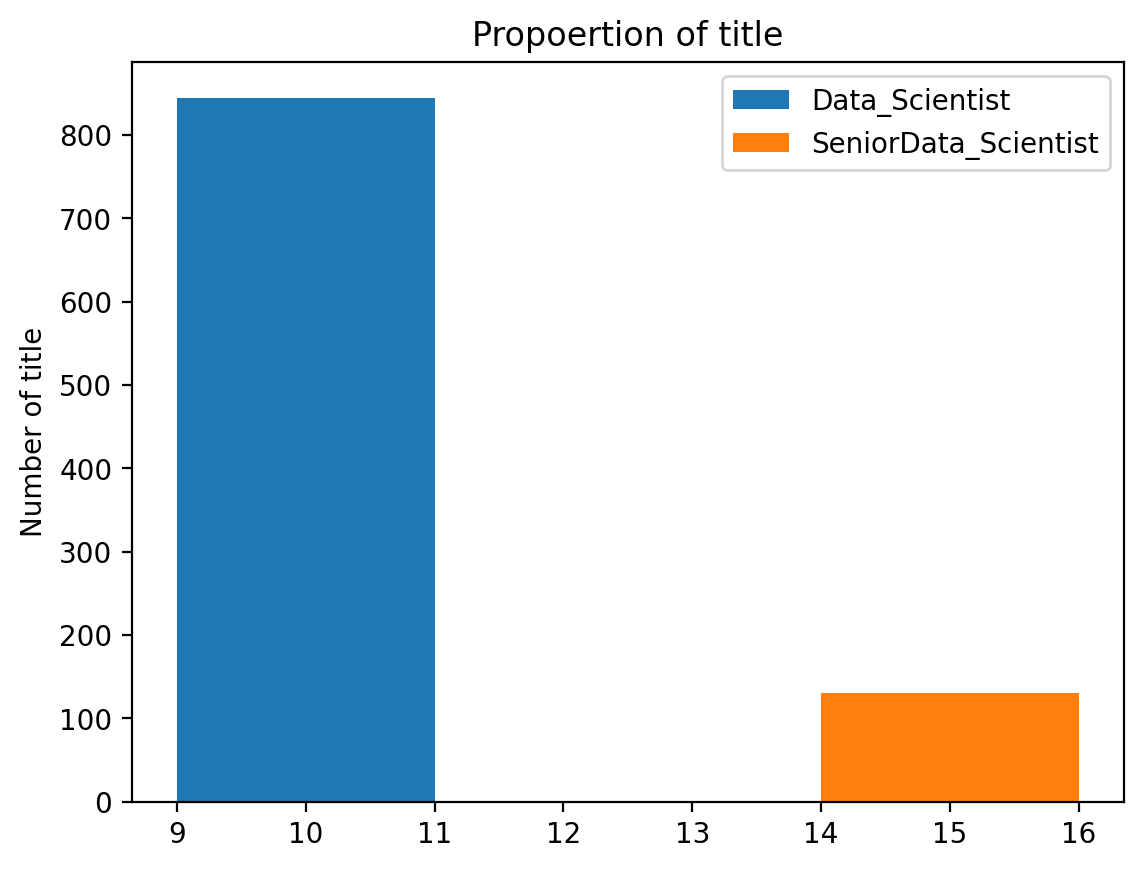

In [181]:
# bar plot of the 2 classes
plt.bar(10,Data_Scientist,2, label="Data_Scientist")
plt.bar(15,SeniorData_Scientist,2, label="SeniorData_Scientist")
plt.legend()
plt.ylabel('Number of title')
plt.title('Propoertion of title')
plt.show()

## tfIdf comparision on Junior and Senior

In [182]:
data_Junior['Description'] = data_Junior['Description'].apply(remove_punctuation)
data_Senior['Description'] = data_Senior['Description'].apply(remove_punctuation)

<ipython-input-182-161d3c84fbbf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Junior['Description'] = data_Junior['Description'].apply(remove_punctuation)


In [183]:
corpus_Junior = (" ".join(data_Junior['Description'].tolist())).lower()
corpus_Senior = (" ".join(data_Senior['Description'].tolist())).lower()

In [184]:
tokenized_Junior= nltk.word_tokenize(corpus_Junior)
tokenized_Senior = nltk.word_tokenize(corpus_Senior)

In [185]:
nsw_Junior = [word.lower() for word in tokenized_Junior if word.lower() not in stop]
nsw_Senior = [word.lower() for word in tokenized_Senior if word.lower() not in stop]

In [186]:
separator = ' '
tfId_Junior = [separator.join(nsw_Junior)]
tfId_Senior = [separator.join(nsw_Senior)]

In [187]:
from sklearn.feature_extraction.text import TfidfTransformer

tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(tfId_Junior)
df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
print (df.head(15))

               TF-IDF
experience   0.433408
work         0.233980
learning     0.209649
team         0.202316
skills       0.157987
machine      0.157098
models       0.136433
years        0.123212
solutions    0.119990
statistical  0.107435
research     0.102991
engineering  0.097547
product      0.093214
knowledge    0.093214
python       0.087215


In [126]:
from sklearn.feature_extraction.text import TfidfTransformer

tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(tfId_Senior)
df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
print (df.head(15))

               TF-IDF
experience   0.407893
work         0.244216
team         0.222782
learning     0.222133
machine      0.166924
models       0.133150
years        0.132500
statistical  0.129902
solutions    0.124706
skills       0.119510
product      0.118861
techniques   0.101324
python       0.096128
technical    0.090282
engineering  0.088334


## Coding languague for data scientist

In [ ]:
tokenized_Junior= nltk.word_tokenize(corpus_Junior)
tokenized_Senior = nltk.word_tokenize(corpus_Senior)

In [270]:
python = 0
r_language = 0
sql = 0
java = 0
scala = 0
c_language = 0
julia = 0
javascript = 0
SAS = 0

In [271]:
for language in tokenized_Junior:
    if language =='python':
        python = python + 1
    if language == 'r':
        r_language = r_language + 1
    if language == 'sql':
        sql = sql + 1
    if language == 'mysql':
        sql = sql + 1
    if language == 'sqlite':
        sql = sql + 1
    if language == 'java':
        java = java + 1
    if language == 'scala':
        scala = scala + 1
    if language == 'c/c++':
        c_language = c_language + 1
    if language == 'julia':
        julia = julia + 1
    if language == 'javascript':
        javascript = javascript + 1
    if language == 'sas':
        SAS = SAS + 1

In [272]:
[python, r_language, sql, java, scala, c_language, julia, javascript, SAS]

[783, 536, 552, 115, 73, 0, 12, 28, 123]

In [273]:
df_language = {'languagues': ["python","R", "SQL", "Java", "Scala", "C/C++", "Julia", "JavaScript", 'SAS'],
        'count': [783, 536, 527, 115, 73, 0, 12, 28, 123]}
df_language = pd.DataFrame(df_language, columns = ['languagues', 'count'])
df_language_jr = df_language.sort_values(by=['count'], ascending=False)

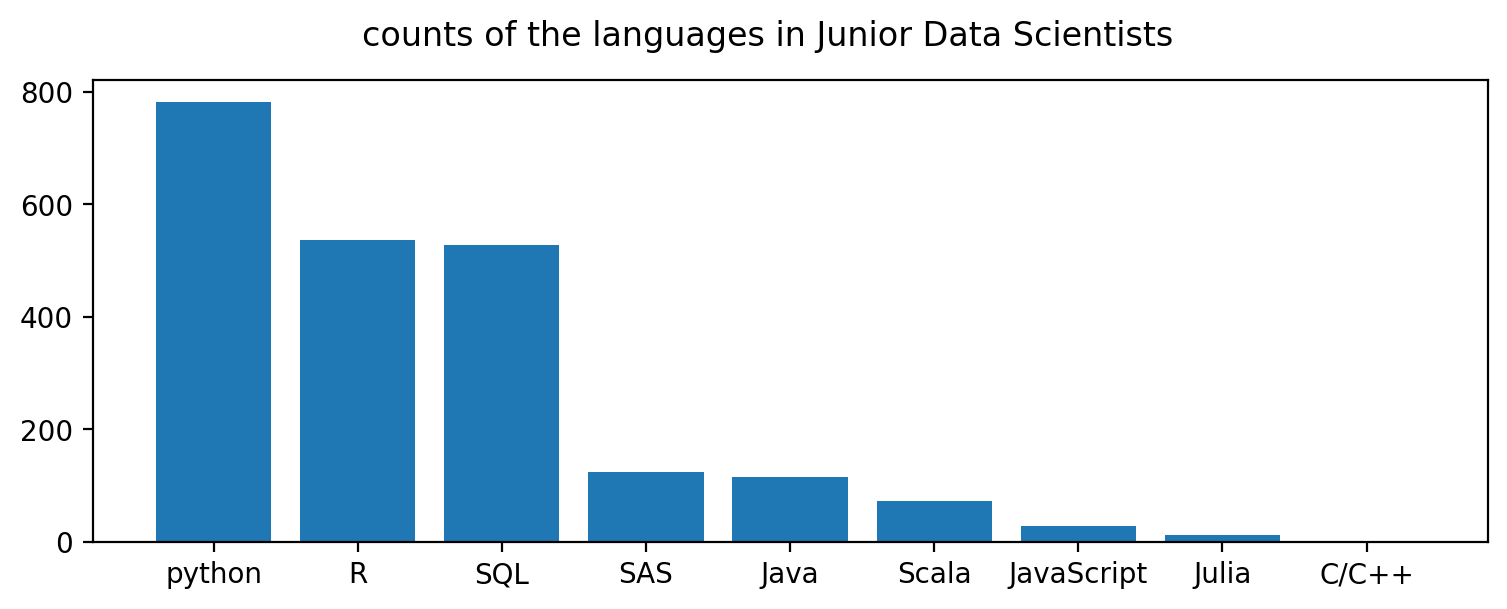

In [274]:
names = df_language_jr['languagues']
values = df_language_jr['count']

plt.figure(figsize=(9, 3))

plt.bar(names,values)
plt.suptitle('counts of the languages in Junior Data Scientists')
plt.show()

In [275]:
python = 0
r_language = 0
sql = 0
java = 0
scala = 0
c_language = 0
julia = 0
javascript = 0
SAS = 0

In [276]:
for language in tokenized_Senior:
    if language =='python':
        python = python + 1
    if language == 'r':
        r_language = r_language + 1
    if language == 'sql':
        sql = sql + 1
    if language == 'mysql':
        sql = sql + 1
    if language == 'sqlite':
        sql = sql + 1
    if language == 'java':
        java = java + 1
    if language == 'scala':
        scala = scala + 1
    if language == 'c/c++':
        c_language = c_language + 1
    if language == 'julia':
        julia = julia + 1
    if language == 'javascript':
        javascript = javascript + 1
    if language == 'sas':
        SAS = SAS + 1

In [277]:
[python, r_language, sql, java, scala, c_language, julia, javascript, SAS]

[148, 88, 102, 21, 26, 0, 3, 1, 18]

In [278]:
df_language = {'languagues': ["python","R", "SQL", "Java", "Scala", "C/C++", "Julia", "JavaScript", 'SAS'],
        'count': [148, 88, 99, 21, 26, 0, 3, 1, 18]}
df_language = pd.DataFrame(df_language, columns = ['languagues', 'count'])
df_language_sr = df_language.sort_values(by=['count'], ascending=False)

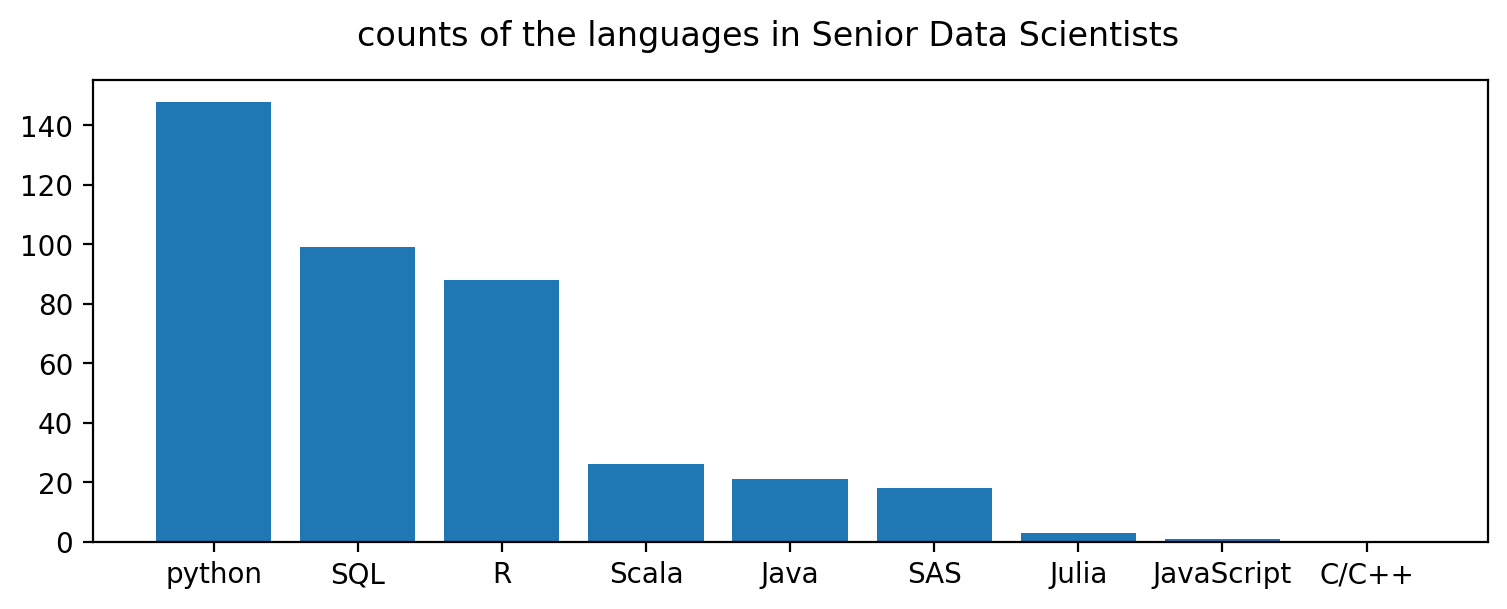

In [279]:
names = df_language_sr['languagues']
values = df_language_sr['count']

plt.figure(figsize=(9, 3))

plt.bar(names,values)
plt.suptitle('counts of the languages in Senior Data Scientists')
plt.show()

## Key tools for data scientists

In [312]:
excel = 0
tableau = 0
spark = 0
hadoop= 0
jupyter = 0
aws = 0
PowerBI = 0
ggplot2 = 0
matlab = 0
tensorflow = 0
scikitlearn = 0
BigML = 0
Matplotlib = 0

In [313]:
for language in tokenized_Junior:
    if language =='excel':
        excel = excel + 1
    if language == 'tableau':
        tableau = tableau + 1
    if language == 'spark':
        spark = spark + 1
    if language == 'hadoop':
        hadoop = hadoop + 1
    if language == 'jupyter':
        jupyter = jupyter + 1
    if language == 'aws':
        aws = aws + 1
    if language == 'PowerbI':
        PowerBI = PowerBI + 1
    if language == 'ggplot2':
        ggplot2 = ggplot2 + 1
    if language == 'matlab':
        matlab = matlab + 1
    if language == 'tensorflow':
        tensorflow = tensorflow + 1
    if language == 'scikitlearn':
        scikitlearn = scikitlearn + 1
    if language == 'bigml':
        BigML= BigML + 1
    if language == 'matplotlib':
        Matplotlib = Matplotlib + 1

In [314]:
[excel,tableau, spark, hadoop, jupyter, aws, PowerBI, ggplot2, tensorflow, scikitlearn, BigML, Matplotlib]

[80, 161, 169, 109, 24, 120, 0, 6, 104, 76, 1, 31]

In [315]:
df_tools = {'key tools':['Excel','Tableau', 'Spark', 'Hadoop', 'Jupyter', 'AWS', 'PowerBI', 'ggplot2', 'TensorFlow', 'scikitlearn', 'BigML', 'Matplotlib'],
        'count': [18, 31, 32, 26, 4, 15, 0, 0, 25, 7, 0, 1]}
df_tools = pd.DataFrame(df_tools, columns = ['key tools', 'count'])
df_tools_jr = df_tools.sort_values(by=['count'], ascending=False)
df_tools_jr

,key tools,count
2,Spark,32
1,Tableau,31
3,Hadoop,26
8,TensorFlow,25
0,Excel,18
5,AWS,15
9,scikitlearn,7
4,Jupyter,4
11,Matplotlib,1
6,PowerBI,0


In [316]:
df_tools_jr = df_tools_jr[df_tools_sr['count'] != 0]

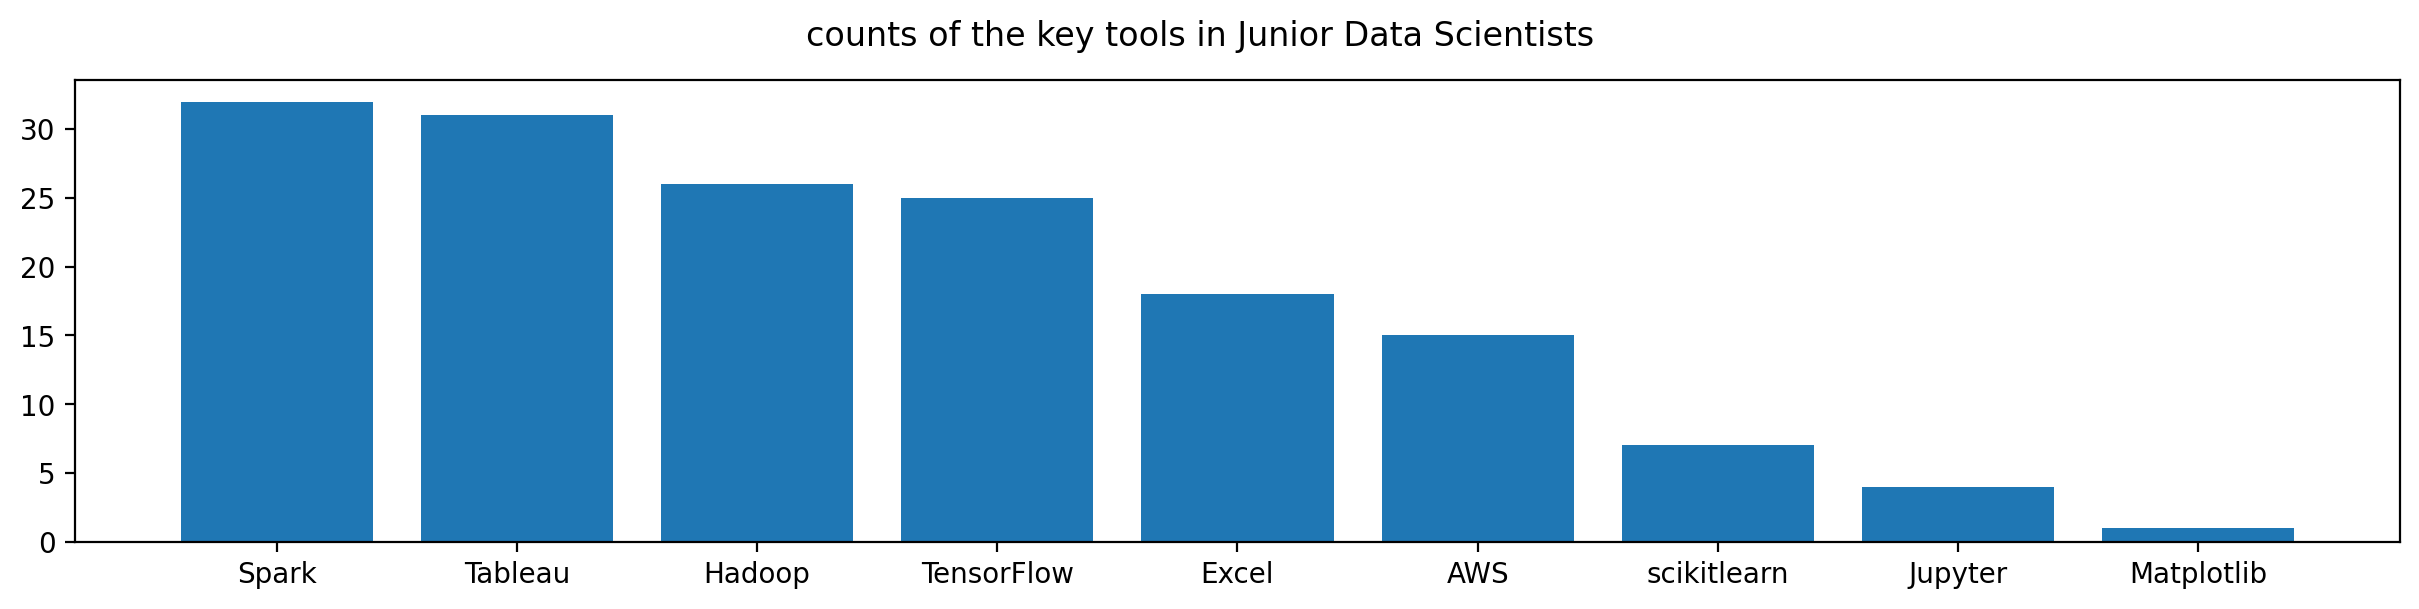

In [317]:
names = df_tools_jr['key tools']
values = df_tools_jr['count']

plt.figure(figsize=(15, 3))

plt.bar(names,values)
plt.suptitle('counts of the key tools in Junior Data Scientists')
plt.show()

In [318]:
excel = 0
tableau = 0
spark = 0
hadoop= 0
jupyter = 0
aws = 0
PowerBI = 0
ggplot2 = 0
matlab = 0
tensorflow = 0
scikitlearn = 0
BigML = 0
Matplotlib = 0

In [319]:
for language in tokenized_Senior:
    if language =='excel':
        excel = excel + 1
    if language == 'tableau':
        tableau = tableau + 1
    if language == 'spark':
        spark = spark + 1
    if language == 'hadoop':
        hadoop = hadoop + 1
    if language == 'jupyter':
        jupyter = jupyter + 1
    if language == 'aws':
        aws = aws + 1
    if language == 'PowerbI':
        PowerBI = PowerBI + 1
    if language == 'ggplot2':
        ggplot2 = ggplot2 + 1
    if language == 'matlab':
        matlab = matlab + 1
    if language == 'tensorflow':
        tensorflow = tensorflow + 1
    if language == 'scikitlearn':
        scikitlearn = scikitlearn + 1
    if language == 'bigml':
        BigML= BigML + 1
    if language == 'matplotlib':
        Matplotlib = Matplotlib + 1

In [338]:
tools_count = [excel,tableau, spark, hadoop, jupyter, aws, PowerBI, ggplot2, tensorflow, scikitlearn, BigML, Matplotlib]

In [339]:
df_tools = {'key tools':['Excel','Tableau', 'Spark', 'Hadoop', 'Jupyter', 'AWS', 'PowerBI', 'ggplot2', 'TensorFlow', 'scikitlearn', 'BigML', 'Matplotlib'],
        'count': tools_count}
df_tools = pd.DataFrame(df_tools, columns = ['key tools', 'count'])
df_tools_sr = df_tools.sort_values(by=['count'], ascending=False)
df_tools_sr

,key tools,count
2,Spark,32
1,Tableau,31
3,Hadoop,26
8,TensorFlow,25
0,Excel,18
5,AWS,15
9,scikitlearn,7
4,Jupyter,4
11,Matplotlib,1
6,PowerBI,0


In [341]:
df_tools_sr = df_tools_sr[df_tools_sr['count'] != 0]

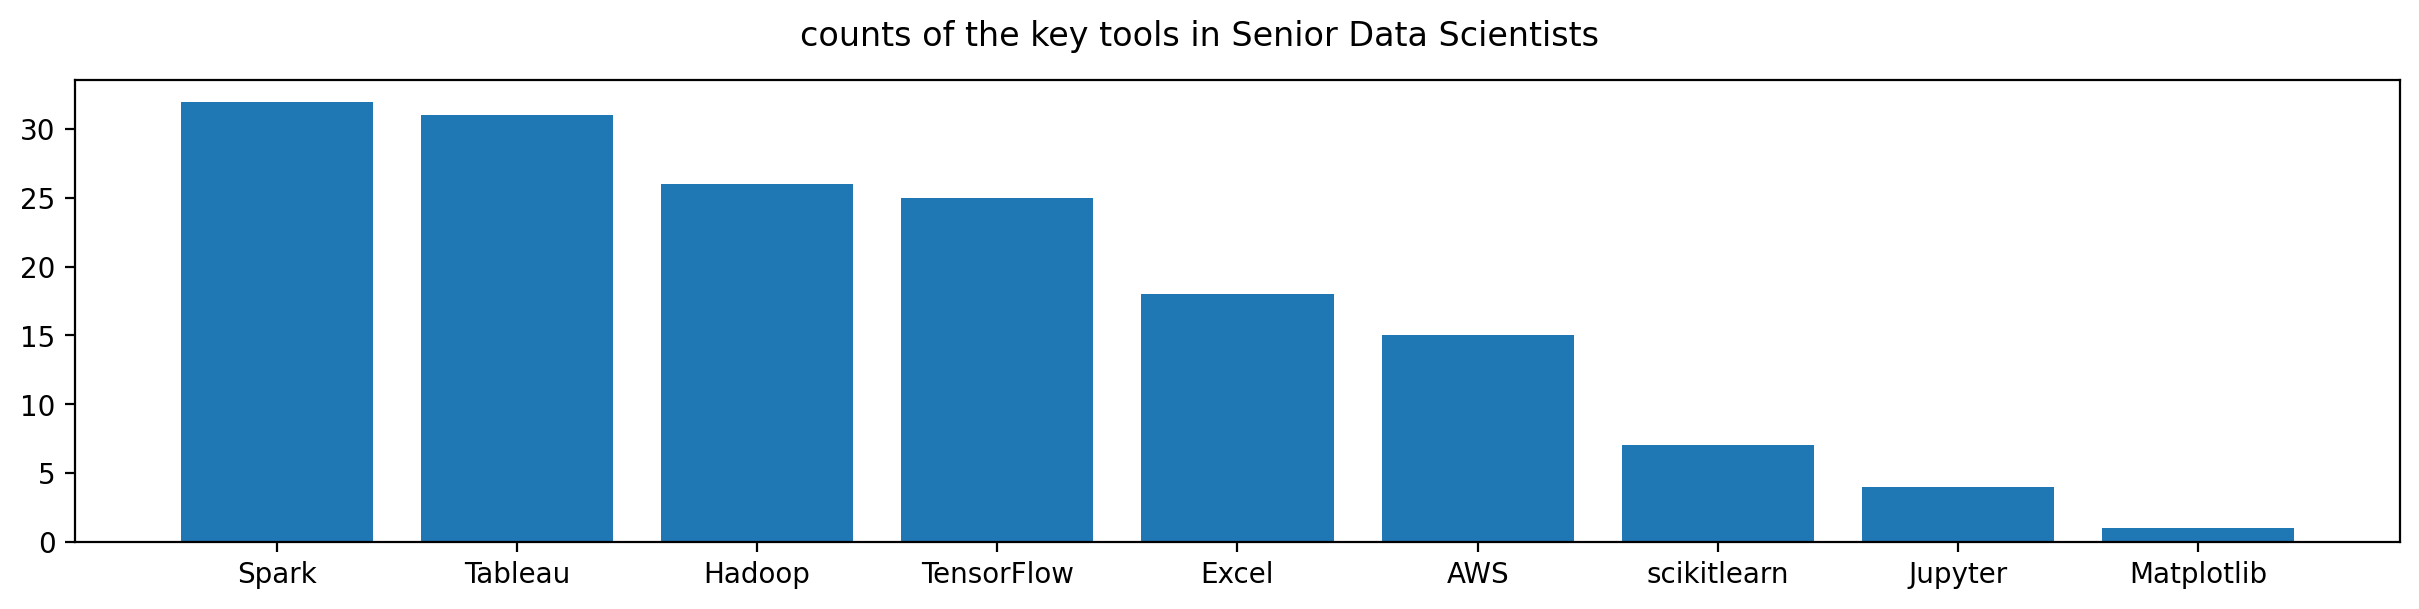

In [342]:
names = df_tools_sr['key tools']
values = df_tools_sr['count']

plt.figure(figsize=(15, 3))

plt.bar(names,values)
plt.suptitle('counts of the key tools in Senior Data Scientists')
plt.show()

## Skills set for data scientists

In [330]:
Statistics = 0
Probability = 0
Programming = 0
Linear_Algebra = 0
Machine_Learning = 0
Deep_Learning = 0
BigData = 0
Domain_Knowledge = 0
Communication = 0
Problem_Solving = 0

In [332]:
for i in tokenized_Junior:
    if i =='statistics':
        Statistics = Statistics + 1
    if i == 'probability':
        Probability = Probability + 1
    if i == 'programming':
        Programming = Programming + 1
    if i == 'linear':
        Linear_Algebra = Linear_Algebra + 1
    if i == 'machine':
        Machine_Learning = Machine_Learning + 1
    if i == 'deep':
        Deep_Learning = Deep_Learning + 1
    if i == 'bigdata':
        BigData = BigData + 1
    if i == 'domain':
        Domain_Knowledge = Domain_Knowledge + 1
    if i == 'communication':
        Communication = Communication + 1
    if i == 'communicate':
        Communication = Communication + 1
    if i == 'solving':
        Problem_Solving = Problem_Solving + 1

In [336]:
skills = [Statistics, Probability, Programming, Linear_Algebra, Machine_Learning, Deep_Learning, BigData, 
Domain_Knowledge, Communication, Problem_Solving]

In [337]:
df_skills = {'skills set':['Statistics', 'Probability', 'Programming', 'Linear Algebra', 'Machine Learning', 'Deep Learning', 'BigData', 
'Domain_Knowledge', 'Communication', 'Problem Solving'],
        'count': skills}
df_skills = pd.DataFrame(df_skills, columns = ['skills set', 'count'])
df_skills_jr = df_skills.sort_values(by=['count'], ascending=False)
df_skills_jr

,skills set,count
4,Machine Learning,2828
0,Statistics,1476
8,Communication,1273
2,Programming,910
5,Deep Learning,856
9,Problem Solving,406
7,Domain_Knowledge,156
3,Linear Algebra,138
1,Probability,70
6,BigData,20


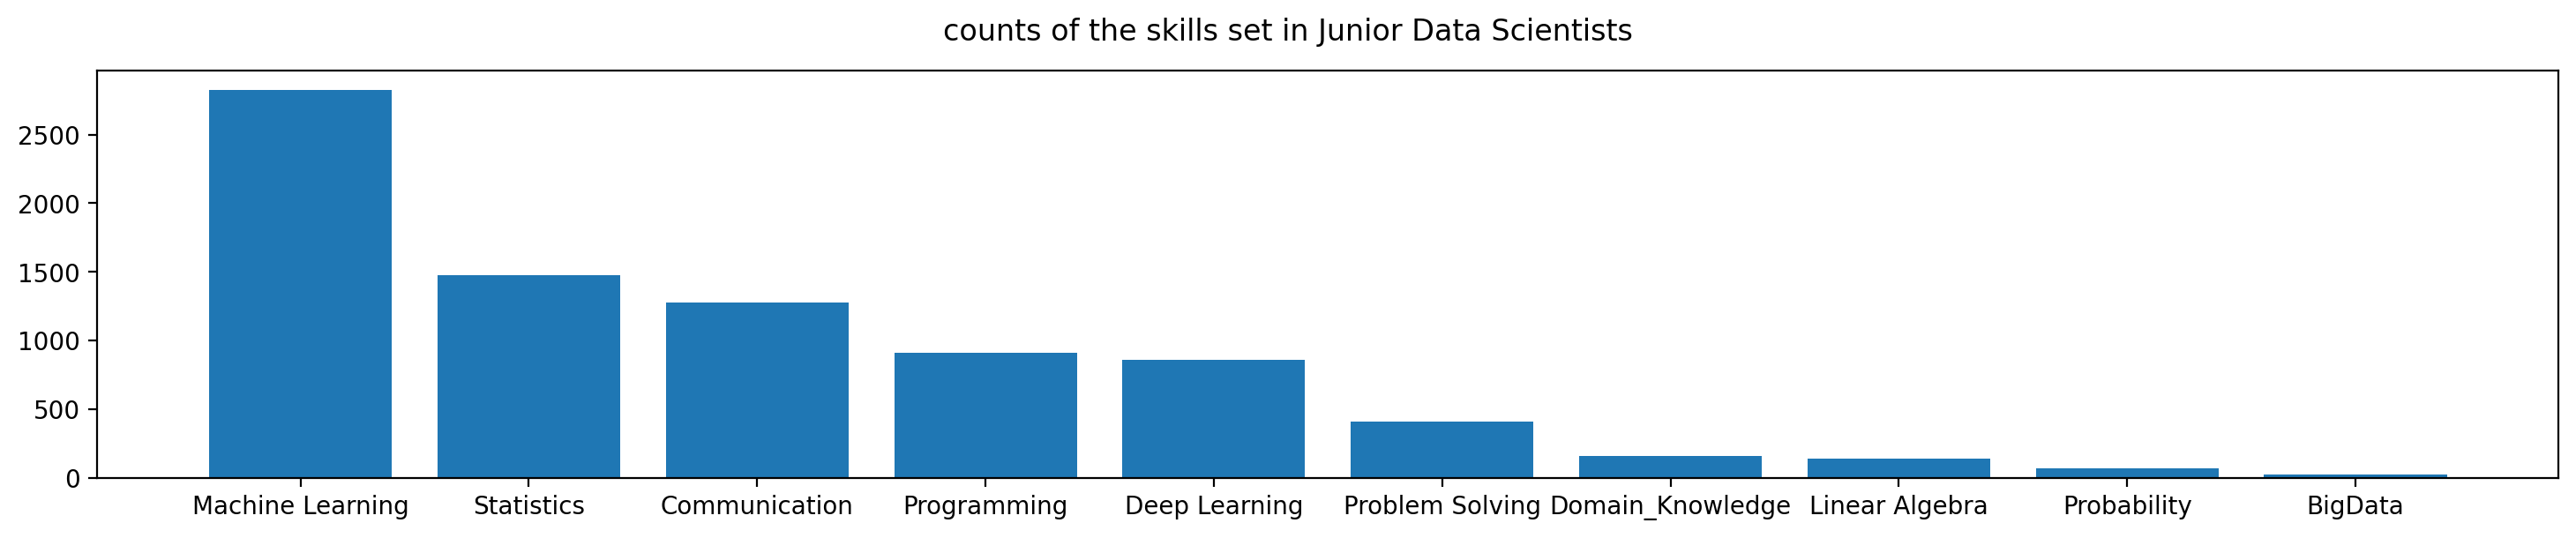

In [346]:
names = df_skills_jr['skills set']
values = df_skills_jr['count']

plt.figure(figsize=(18, 3))

plt.bar(names,values)
plt.suptitle('counts of the skills set in Junior Data Scientists')
plt.show()